# Import Libraries and Constants

In [22]:
%matplotlib inline
import torch as th
import torch.nn as nn 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_poisson_deviance, d2_tweedie_score, make_scorer, auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from skorch import NeuralNetRegressor, NeuralNet, callbacks
import utils
import architecture
import run_config
from pandas._libs.lib import is_integer

In [23]:
FL_PATH = '../ag_0/fl_model_Final_10ag_350rnd_10ep_0qt_0SMPCn.pt'

In [24]:
FL_NUM_UNITS_1 = run_config.NUM_UNITS_1

In [25]:
FL_NUM_UNITS_2 = run_config.NUM_UNITS_2

In [26]:
NUM_FEATURES = run_config.NUM_FEATURES

In [27]:
NUM_AGENTS = run_config.server_config["num_clients"]

In [28]:
all_results_df = pd.read_csv('../results/all_results.csv')
top_results_df = all_results_df.loc[all_results_df['rank_test_score']==1]

# Load Models

In [29]:
agent_model_dictionary = {}
for agents in range(NUM_AGENTS):
    agent_model_dictionary["loaded_agent_{0}_model".format(agents)] = eval('utils.load_model(agent='+str(agents)+')')

## Load Federated Model

In [30]:
fl_model = architecture.MultipleRegression(num_features=NUM_FEATURES, num_units_1=FL_NUM_UNITS_1, num_units_2=FL_NUM_UNITS_2)
fl_model.load_state_dict(th.load(FL_PATH))
fl_model.eval()

MultipleRegression(
  (layer_1): Linear(in_features=39, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=20, bias=True)
  (layer_out): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0, inplace=False)
  (act): Tanh()
)

Again can lookup each agent's model

In [31]:
agent_model_dictionary['loaded_agent_0_model']

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MultipleRegression(
    (layer_1): Linear(in_features=39, out_features=10, bias=True)
    (layer_2): Linear(in_features=10, out_features=20, bias=True)
    (layer_out): Linear(in_features=20, out_features=1, bias=True)
    (dropout): Dropout(p=0, inplace=False)
    (act): Tanh()
  ),
)

## Load global model

In [32]:
loaded_agent_global_model = utils.load_model(agent=-1)

# Load Test Data and Functions

In [33]:
X_test, y_test, df_test = utils.create_test_data()

# One Way AvE Graphs

Create dataset to graph

In [34]:
df_test_pred = utils.create_df_test_pred(df_test, X_test, NUM_AGENTS, loaded_agent_global_model, fl_model, agent_model_dictionary)

Define agents to graph

In [35]:
agents_to_graph_list = [9]

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


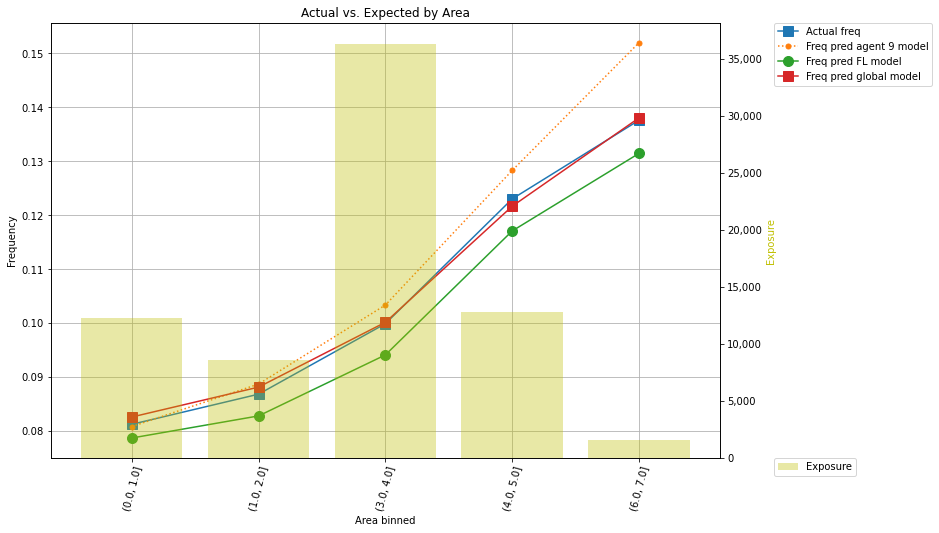

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


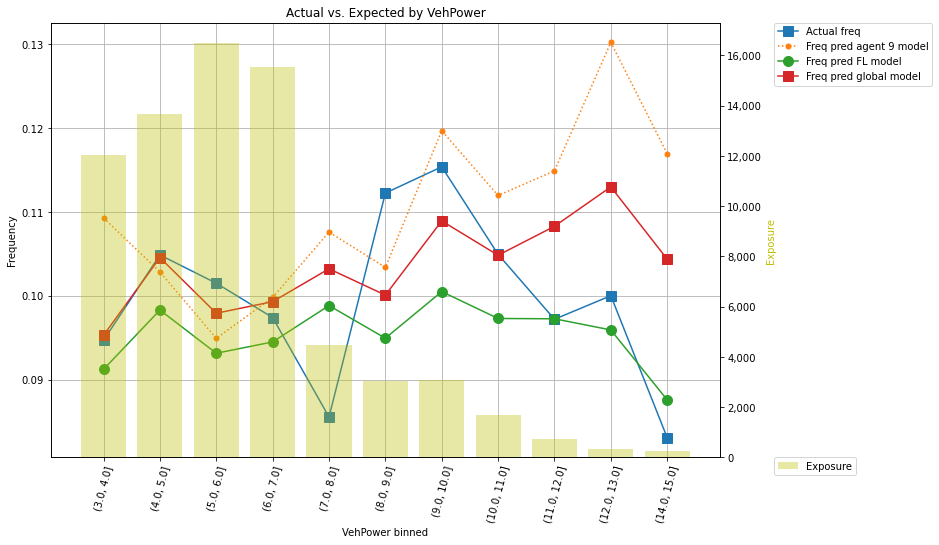

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


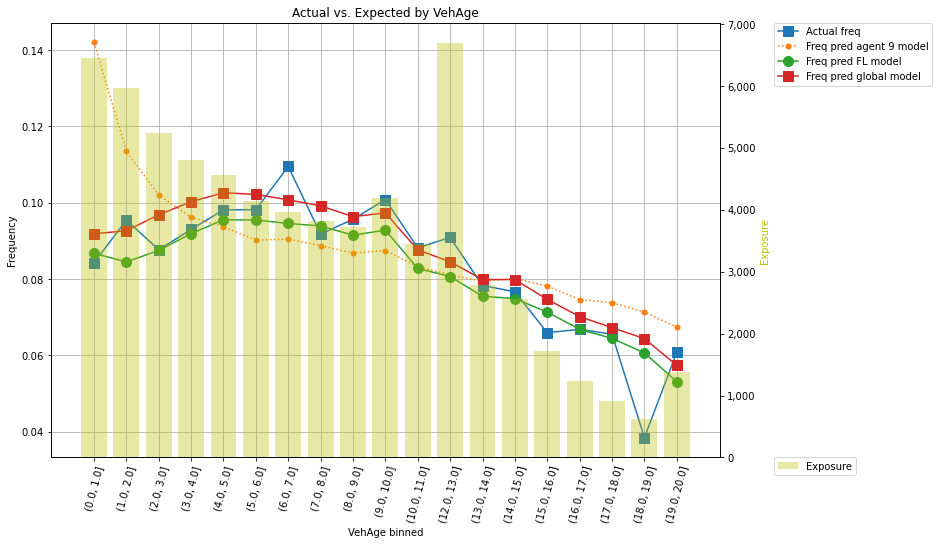

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


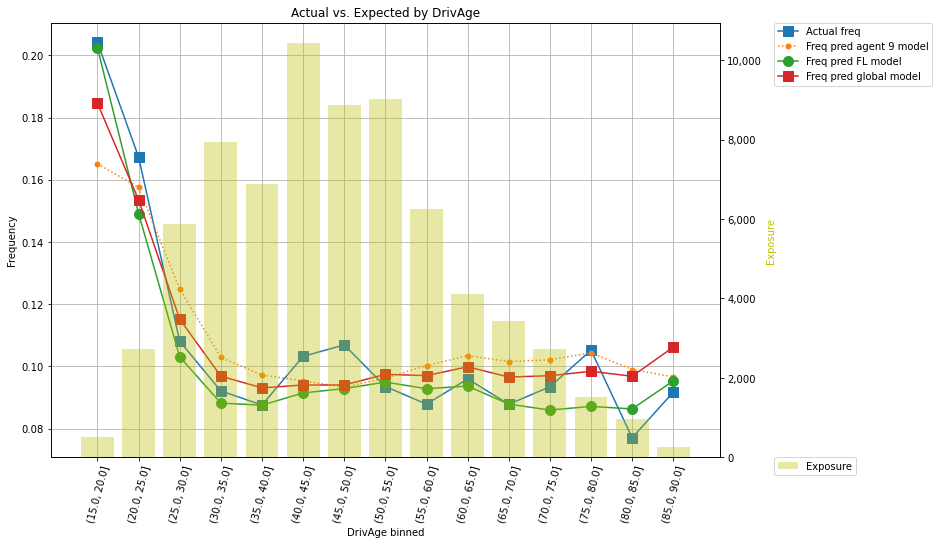

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


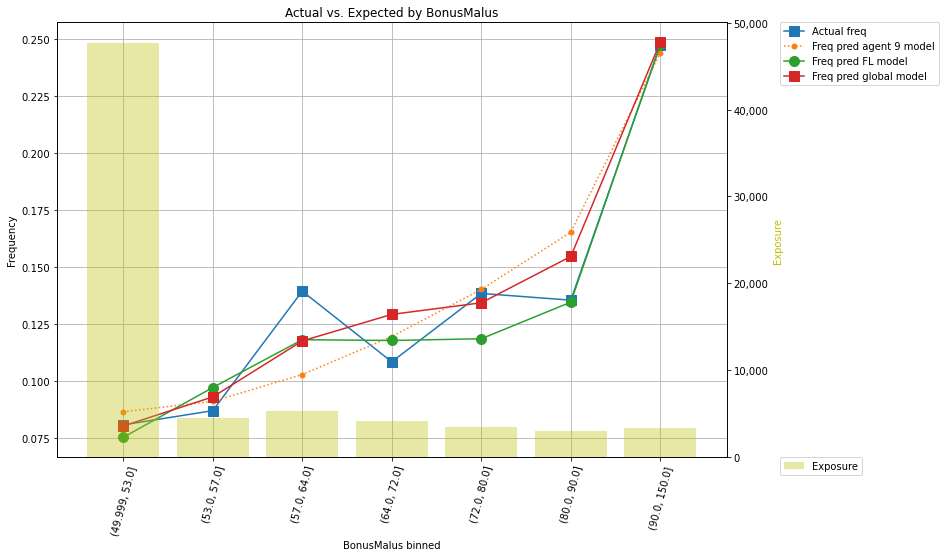

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


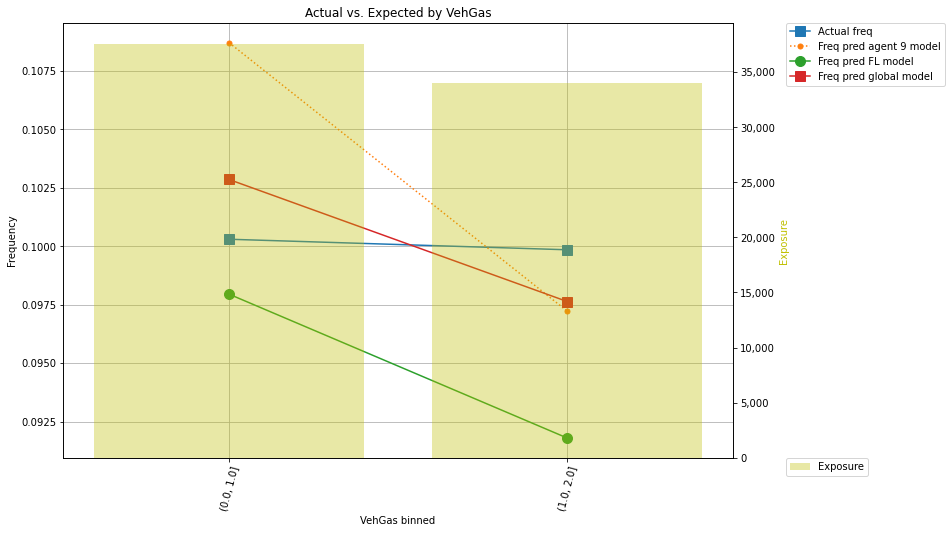

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


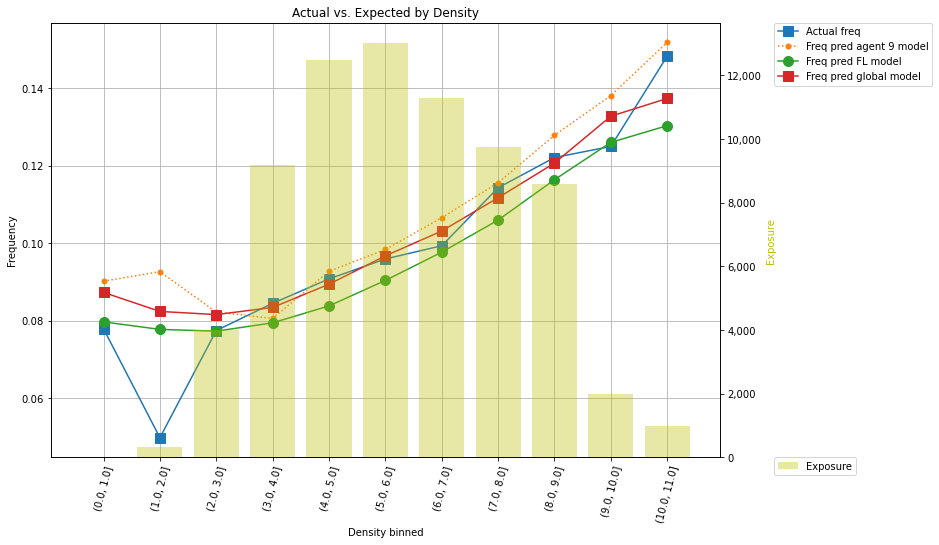

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


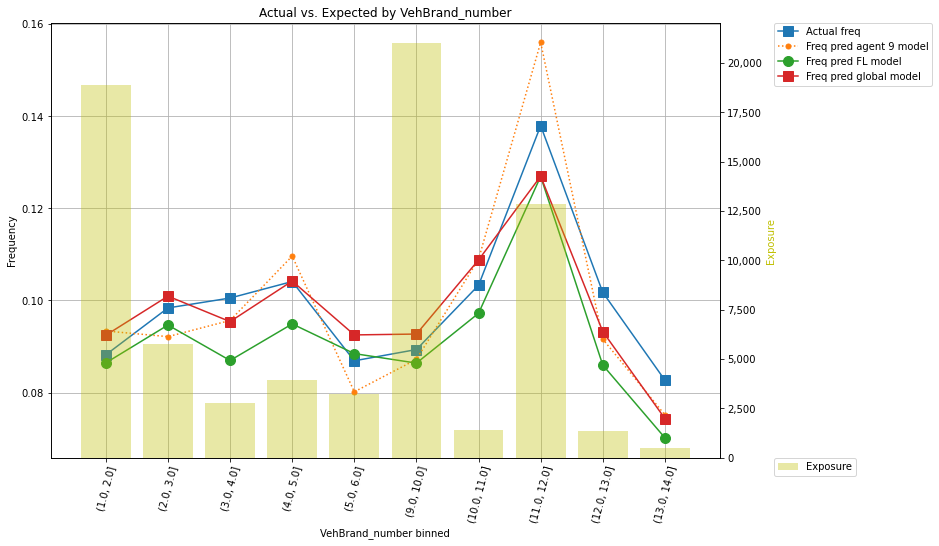

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:825: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


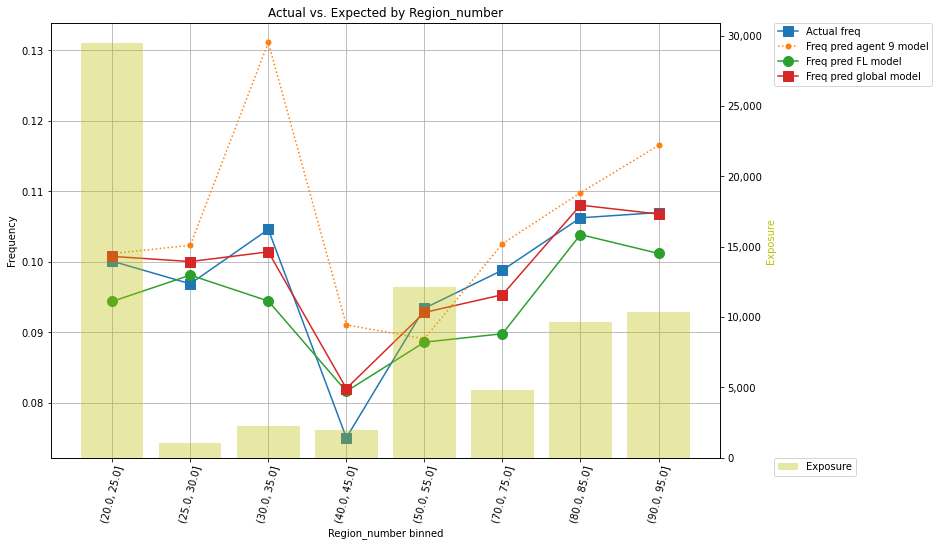

In [36]:
for i in ['Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehGas', 'Density', 'VehBrand_number', 'Region_number']:
    utils.one_way_graph_comparison(i, df_test_pred, agents_to_graph_list, NUM_AGENTS)

# Lift Charts

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:913: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


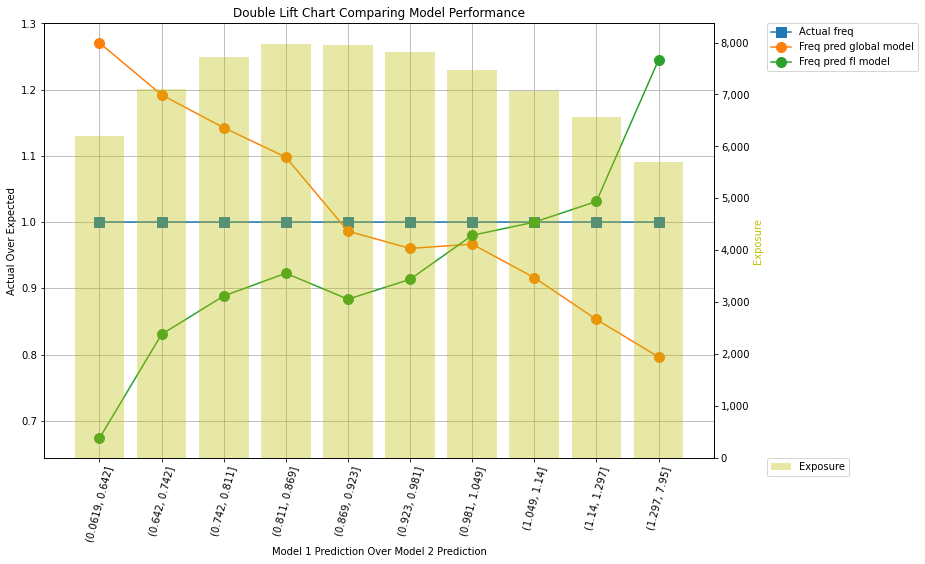

In [37]:
utils.double_lift_rebase(df_test_pred, 'fl', 'global')

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:913: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


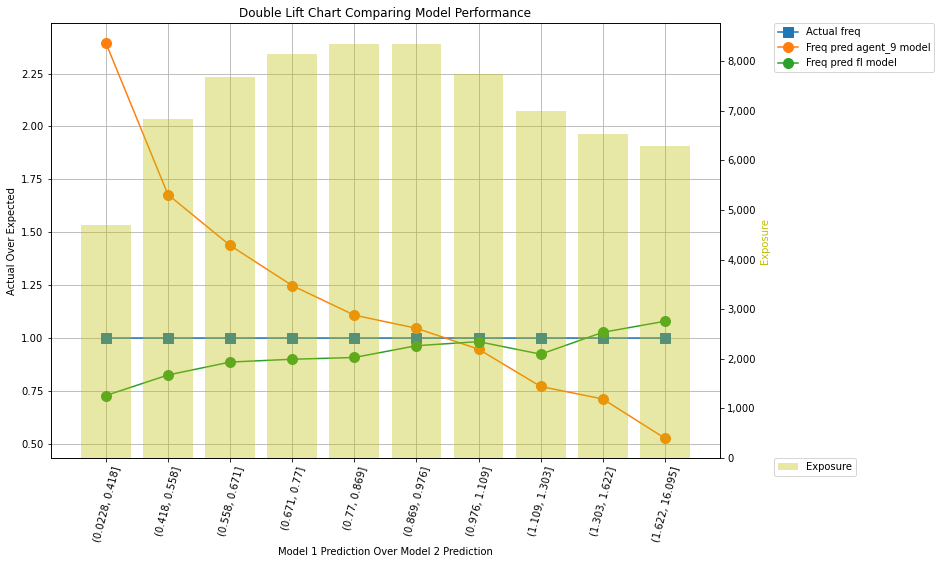

In [38]:
utils.double_lift_rebase(df_test_pred, 'fl', 'agent_9')

c:\Users\dylan\Projects\prod_Xavier_init2\IFoA-FL-WP\code\utils.py:913: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.0f}'.format(x) for x in vals])


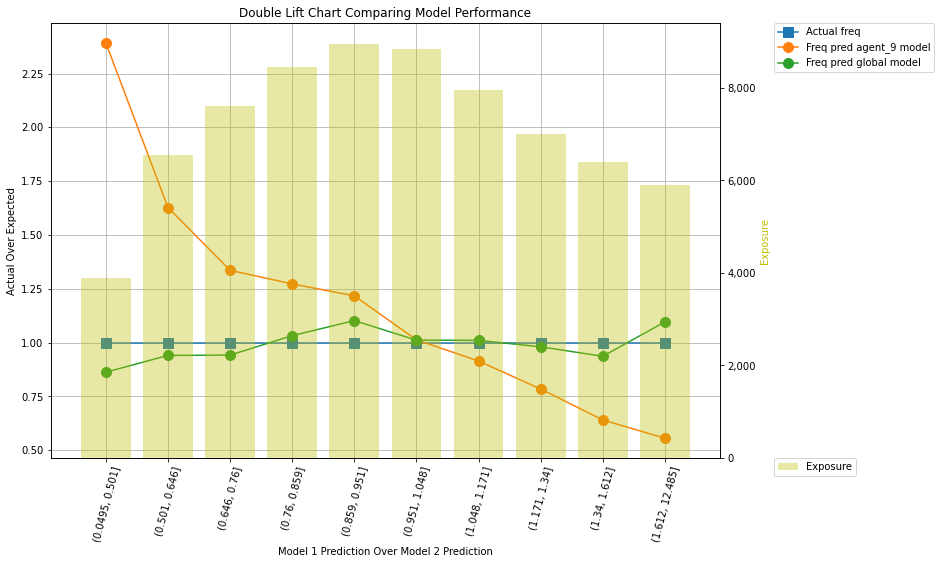

In [39]:
utils.double_lift_rebase(df_test_pred, 'global', 'agent_9')

# Gini

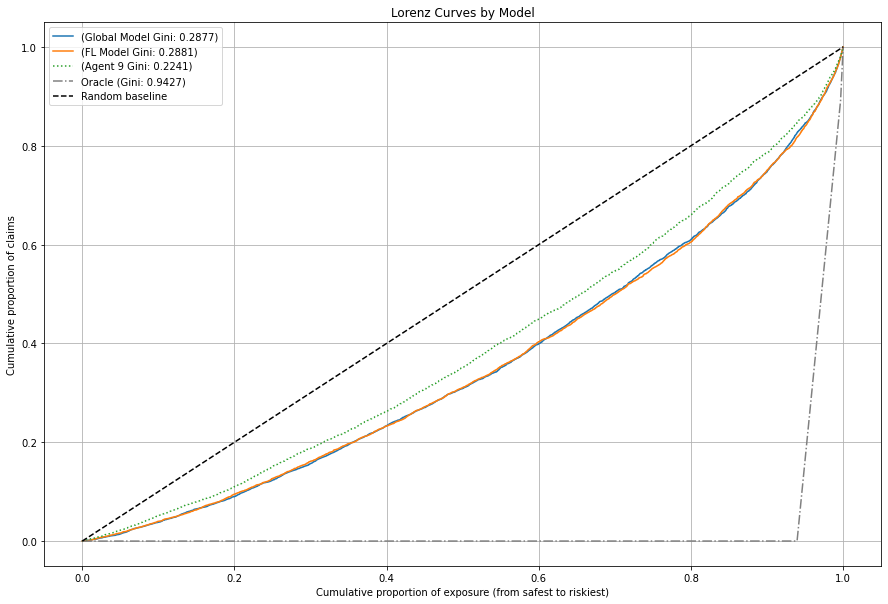

In [40]:
fig, ax = plt.subplots(figsize=(15, 10))

cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb_pred'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "(Global Model Gini: {:.4f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb_fl_pred'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "(FL Model Gini: {:.4f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-", label=label)

for agents in agents_to_graph_list:
    cum_exposure, cum_claims = utils.lorenz_curve(
        df_test_pred['ClaimNb'], df_test_pred['ClaimNb_agent_'+str(agents)+'_pred'], df_test_pred["Exposure"]
    )
    gini = 1 - 2 * auc(cum_exposure, cum_claims)
    label = '(Agent {} Gini: {:.4f})'.format(agents, gini)
    plt.plot(cum_exposure, cum_claims, linestyle="dotted", label=label)

# Oracle model: y_pred == y_test
cum_exposure, cum_claims = utils.lorenz_curve(
    df_test_pred['ClaimNb'], df_test_pred['ClaimNb'], df_test_pred["Exposure"]
)
gini = 1 - 2 * auc(cum_exposure, cum_claims)
label = "Oracle (Gini: {:.4f})".format(gini)
ax.plot(cum_exposure, cum_claims, linestyle="-.", color="gray", label=label)

# Random Baseline
ax.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random baseline")
ax.set(
    title="Lorenz Curves by Model",
    xlabel="Cumulative proportion of exposure (from safest to riskiest)",
    ylabel="Cumulative proportion of claims",
)

plt.grid()
ax.legend(loc="upper left")

#plt.savefig(f'../ag_{ag}/' + 'lift_chart')

# Metric comparison

In [41]:
y_fl_pred = df_test['ClaimNb_fl_pred']

In [42]:
fl_weighted_pde = d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)
fl_weighted_pde

0.05274022035843606

In [43]:
weighted_pde_df = top_results_df[['agent', 'test_weighted_pde']]
# Add in FL result
weighted_pde_df.loc[151] = [-2, d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)]
weighted_pde_df['fl_relative_increase'] = fl_weighted_pde/weighted_pde_df['test_weighted_pde'] - 1
# Rename
weighted_pde_df['model'] = 'Agent'+' '+weighted_pde_df['agent'].astype(int).apply(str)
weighted_pde_df['model'] = weighted_pde_df['model'].str.replace('Agent -1','Global Model')
weighted_pde_df['model'] = weighted_pde_df['model'].str.replace('Agent -2','Federated Model')
weighted_pde_df

C:\Users\dylan\AppData\Local\Temp\ipykernel_64076\956015744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_pde_df.loc[151] = [-2, d2_tweedie_score(y_test, y_fl_pred, sample_weight=X_test[:, 0], power=1)]
C:\Users\dylan\AppData\Local\Temp\ipykernel_64076\956015744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weighted_pde_df['fl_relative_increase'] = fl_weighted_pde/weighted_pde_df['test_weighted_pde'] - 1
C:\Users\dylan\AppData\Local\Temp\ipykernel_64076\956015744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,agent,test_weighted_pde,fl_relative_increase,model
0,-1.0,0.054114,-0.025393,Global Model
30,0.0,0.032642,0.615713,Agent 0
60,1.0,0.018596,1.836147,Agent 1
90,2.0,0.034955,0.508819,Agent 2
120,3.0,0.026244,1.009621,Agent 3
150,4.0,0.028191,0.870794,Agent 4
180,5.0,0.034741,0.518091,Agent 5
210,6.0,0.026823,0.966243,Agent 6
240,7.0,0.034302,0.537512,Agent 7
270,8.0,0.032704,0.612639,Agent 8


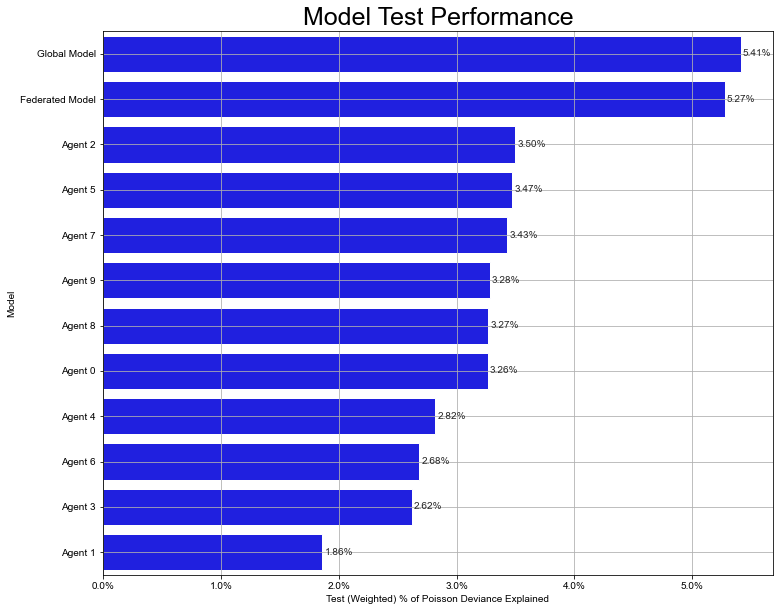

In [44]:
fig, ax = plt.subplots(figsize=(12,10))

sns.set_style('white')

ax=sns.barplot(y='model', 
               x='test_weighted_pde',
               data=weighted_pde_df.iloc[0:,:].sort_values(by=['test_weighted_pde'], ascending = False),
               orient='h',
               color='blue',
               )
plt.title('Model Test Performance', fontsize=25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Test (Weighted) % of Poisson Deviance Explained', fontsize=10)
plt.ylabel('Model', fontsize=10)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))
#ax.axvline(global_weighted_pde, ls='--')
#ax.annotate('Global Model Test Performance', xy=(global_weighted_pde, -0.5), horizontalalignment='center', weight='semibold', size='medium')
for i in range(12):
    ax.text(round(weighted_pde_df.sort_values(by=['test_weighted_pde'], ascending=False).reset_index(drop=True).iloc[0+i:1+i,1],4).tolist()[0]+0.0002, 
            i, 
            '{:.2%}'.format(round(weighted_pde_df.sort_values(by=['test_weighted_pde'], ascending=False).reset_index(drop=True).iloc[0+i:1+i,1],4).tolist()[0]),
            verticalalignment='center',
            fontdict=(dict(fontsize=10)))
ax.grid(True)
plt.show()

In [45]:
weighted_pde_df_box_plot = weighted_pde_df[['model', 'test_weighted_pde']].loc[(weighted_pde_df['model']!='Global Model') & (weighted_pde_df['model']!='Federated Model')]
weighted_pde_df_box_plot = weighted_pde_df_box_plot.rename(columns={"test_weighted_pde": "Local Agents"})
weighted_pde_df_box_plot['Federated Model'] = max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Federated Model'])
weighted_pde_df_box_plot['Global Model'] = max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model'])
weighted_pde_df_box_plot

,model,Local Agents,Federated Model,Global Model
30,Agent 0,0.032642,0.05274,0.054114
60,Agent 1,0.018596,0.05274,0.054114
90,Agent 2,0.034955,0.05274,0.054114
120,Agent 3,0.026244,0.05274,0.054114
150,Agent 4,0.028191,0.05274,0.054114
180,Agent 5,0.034741,0.05274,0.054114
210,Agent 6,0.026823,0.05274,0.054114
240,Agent 7,0.034302,0.05274,0.054114
270,Agent 8,0.032704,0.05274,0.054114
300,Agent 9,0.032806,0.05274,0.054114


C:\Users\dylan\AppData\Local\Temp\ipykernel_64076\2666962247.py:31: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(1,


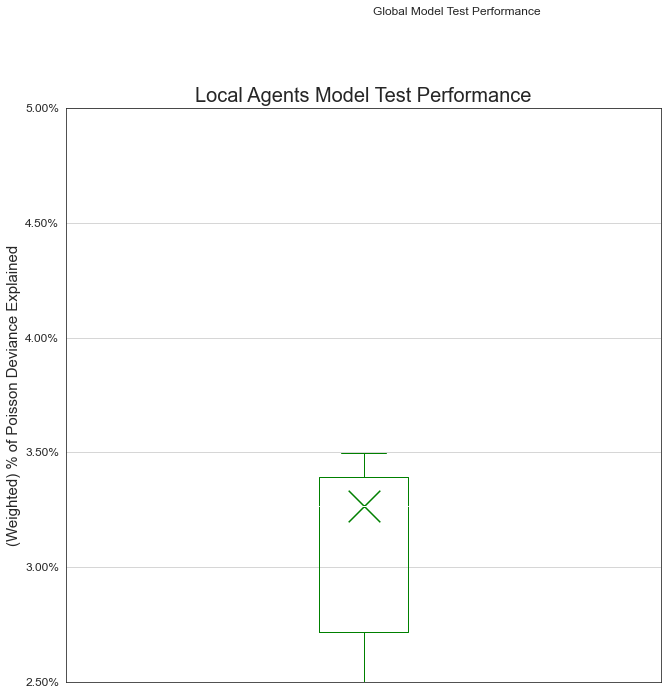

In [46]:
ax = weighted_pde_df_box_plot[['Local Agents']].plot.box(
                                    #vert=False,
                                    #patch_artist=True,
                                    #whis=10
                                    medianprops = dict(linestyle='solid', linewidth=1, color='white'),
                                    boxprops=dict(color='green'),
                                    whiskerprops=dict(color='green'),
                                    flierprops=dict(color='green'),
                                    capprops=dict(color='green')
                                    )
ax.set_title("Local Agents Model Test Performance", fontsize=20)
ax.set_ylabel('(Weighted) % of Poisson Deviance Explained', fontsize=15)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(bottom=0.025,top=0.05)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.figure.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10, 10)
#plt.xticks(fontsize=15)
ax.set_xticks([])
plt.yticks(fontsize=12)
graph_marker='x'
plt.scatter(1, 
            max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model'])
            , marker=graph_marker, 
            s=1000, 
            #facecolors='y', 
            #edgecolors='b'
            )
plt.scatter(1, 
            weighted_pde_df_box_plot['Local Agents'].median(),
            marker=graph_marker, 
            s=1000, 
            facecolors='green', 
            edgecolors='green'
            )

ax.text(1.015,
        weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model']+0.000075, 
       'Global Model Test Performance',
        verticalalignment='center',
        fontdict=(dict(fontsize=12))
        )

plt.show()


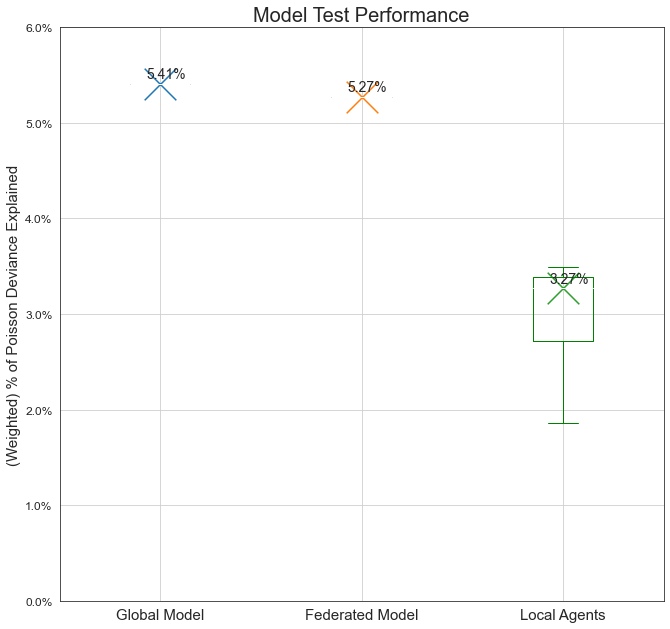

In [50]:
ax = weighted_pde_df_box_plot[['Global Model', 'Federated Model', 'Local Agents']].plot.box(
                                    #vert=False,
                                    #patch_artist=True,
                                    #whis=10
                                    medianprops = dict(linestyle='solid', linewidth=1, color='white'),
                                    boxprops=dict(color='green'),
                                    whiskerprops=dict(color='green'),
                                    flierprops=dict(color='green'),
                                    capprops=dict(color='green')
                                    )
ax.set_title("Model Test Performance", fontsize=20)
ax.set_ylabel('(Weighted) % of Poisson Deviance Explained', fontsize=15)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(bottom=0.0,top=0.06)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.figure.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
graph_marker='x'
plt.scatter(1, 
            max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model'])
            , marker=graph_marker, 
            s=1000, 
            #facecolors='y', 
            #edgecolors='b'
            )
plt.scatter(2, 
            max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Federated Model'])
            , marker=graph_marker, 
            s=1000, 
            #facecolors='y', 
            #edgecolors='b'
            )
plt.scatter(3, 
            weighted_pde_df_box_plot['Local Agents'].median(),
            marker=graph_marker, 
            s=1000, 
            #facecolors='y', 
            #edgecolors='b'
            )

ax.text(0.93,
        weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model']+0.001, 
       '{:.2%}'.format(max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Global Model'])),
        verticalalignment='center',
        fontdict=(dict(fontsize=14))
        )

ax.text(1.93,
        weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Federated Model']+0.001, 
       '{:.2%}'.format(max(weighted_pde_df['test_weighted_pde'].loc[weighted_pde_df['model']=='Federated Model'])),
        verticalalignment='center',
        fontdict=(dict(fontsize=14))
        )

ax.text(2.93,
        weighted_pde_df_box_plot['Local Agents'].median()+0.001, 
       '{:.2%}'.format(weighted_pde_df_box_plot['Local Agents'].median()),
        verticalalignment='center',
        fontdict=(dict(fontsize=14))
        )

plt.show()


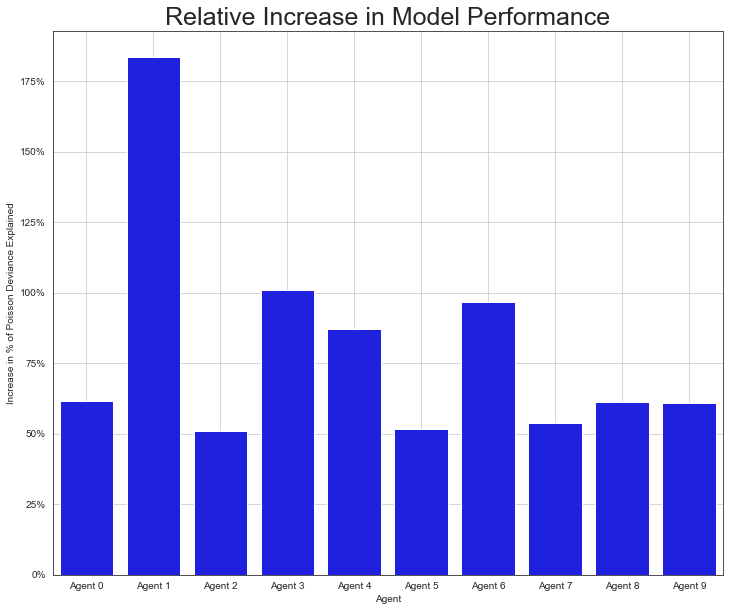

In [48]:
fig, ax = plt.subplots(figsize=(12,10))

sns.set_style('white')

ax=sns.barplot(x='model', 
               y='fl_relative_increase',
               data=weighted_pde_df[~weighted_pde_df.agent.isin([-1, -2])],
               #orient='h',
               color='blue',
               )
plt.title('Relative Increase in Model Performance', fontsize=25)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Increase in % of Poisson Deviance Explained', fontsize=10)
plt.xlabel('Agent', fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(True)
plt.show()